In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from src.utils import apply_matplotlib_settings
from src.quant.long_run_growth.utils import (
    get_data,
    get_code_to_name,
    get_country_active_years,
    get_gdp_pc,
    create_color_map,
    Event,
)

apply_matplotlib_settings()

In [2]:
data = get_data()
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [3]:
country_years = get_country_active_years(data)
code_to_name = get_code_to_name(data)
gdp_pc = get_gdp_pc(data)
gdp_pc.tail()

year,1,730,1000,1090,1120,1252,1253,1254,1255,1256,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
countrycode,,,,,,,,,,,,,,,,,,,,,
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4593.5427,4812.3454,4088.0,4077.0,4165.0,4054.0,2844.0,2506.0,2321.9239,2284.8899
YUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14028.4195,14250.7895,14540.0,14331.0,14500.0,14627.0,14971.0,15416.0,15960.8432,16558.3123
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10873.0463,11318.6045,11838.0,11992.0,12171.0,12242.0,12246.0,12139.0,12189.3579,12165.7948
ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2743.3219,3032.0679,3205.0,3350.0,3419.0,3478.0,3478.0,3479.0,3497.5818,3534.0337
ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1285.0466,1401.8565,1515.0,1604.0,1604.0,1594.0,1560.0,1534.0,1582.3662,1611.4052


In [4]:
color_mapping = create_color_map(data)

### UK

In [5]:
gdp_pc.loc["GBR"]

year
1              NaN
730            NaN
1000     1151.0000
1090           NaN
1120           NaN
           ...    
2014    36436.0000
2015    36941.0000
2016    37334.0000
2017    37782.8283
2018    38058.0856
Name: GBR, Length: 772, dtype: float64

In [6]:
world_events = [
    Event(
        (1650, 1652),
        1.04,
        "the Navigation Act\n(1651)",
        color_mapping["GBR"],
        1,
    ),
    Event(
        (1655, 1684),
        1.40,
        "Closed-door Policy\n(1655-1684)",
        color_mapping["CHN"],
        1.1,
    ),
    Event(
        (1848, 1850),
        1.80,
        "the Repeal of Navigation Act\n(1849)",
        color_mapping["GBR"],
        1.18,
    ),
    Event(
        (1765, 1791),
        1.10,
        "American Revolution\n(1765-1791)",
        color_mapping["USA"],
        1,
    ),
    Event(
        (1760, 1840),
        1.50,
        "Industrial Revolution\n(1760-1840)",
        "grey",
        1.1,
    ),
    Event(
        (1929, 1939),
        1.04,
        "the Great Depression\n(1929–1939)",
        "grey",
        1,
    ),
    Event(
        (1978, 1979),
        1.50,
        "Reform and Opening-up\n(1978-1979)",
        color_mapping["CHN"],
        1.1,
    ),
]

In [7]:
def plot_countries(
    ax,
    color_mapping,
    country_list,
    country_codes,
    gdp_pc,
    start_year,
    end_year,
    log_scale=True,
):
    for country in country_list:
        ax.spines.top.set_visible(False)
        ax.spines.right.set_visible(False)
        ax.set_xlabel("Year")
        ax.set_ylabel("International Dollars")
        country_gdp_pc = gdp_pc.loc[country]
        interpolated = country_gdp_pc.loc[start_year:end_year].interpolate()[
            country_gdp_pc.isnull()
        ]
        if log_scale:
            ax.set_yscale("log")
        ax.plot(
            interpolated,
            linestyle="--",
            color=color_mapping[country],
        )
        ax.plot(
            country_gdp_pc.loc[start_year:end_year],
            color=color_mapping[country],
            label=country_codes.loc[country]["country"],
        )

In [8]:
def draw_events(ax, events):
    t_params = {"fontsize": 9, "va": "baseline", "ha": "center"}
    ylim = ax.get_ylim()[1]
    for event in events:
        event_mid = sum(event.year_range) / 2
        ax.text(
            event_mid,
            ylim * event.y_text,
            event.text,
            color=event.color,
            **t_params
        )
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(
            event_mid,
            ymin=1,
            ymax=event.ymax,
            color=event.color,
            clip_on=False,
            alpha=0.15,
        )

In [9]:
def plot_with_events(
    countries, country_codes, gdp_pc, start_year, end_year, events
):
    fig, ax = plt.subplots()
    # countries = ["CHN", "GBR", "USA", "IND"]
    plot_countries(
        ax=ax,
        color_mapping=color_mapping,
        country_list=countries,
        country_codes=country_codes,
        gdp_pc=gdp_pc,
        start_year=start_year,
        end_year=end_year,
        log_scale=True,
    )
    ylim = ax.get_ylim()[1]
    # events = define_events(ylim)
    draw_events(ax, events)
    fig.set_figwidth(18)
    ax.legend()
    fig.show()

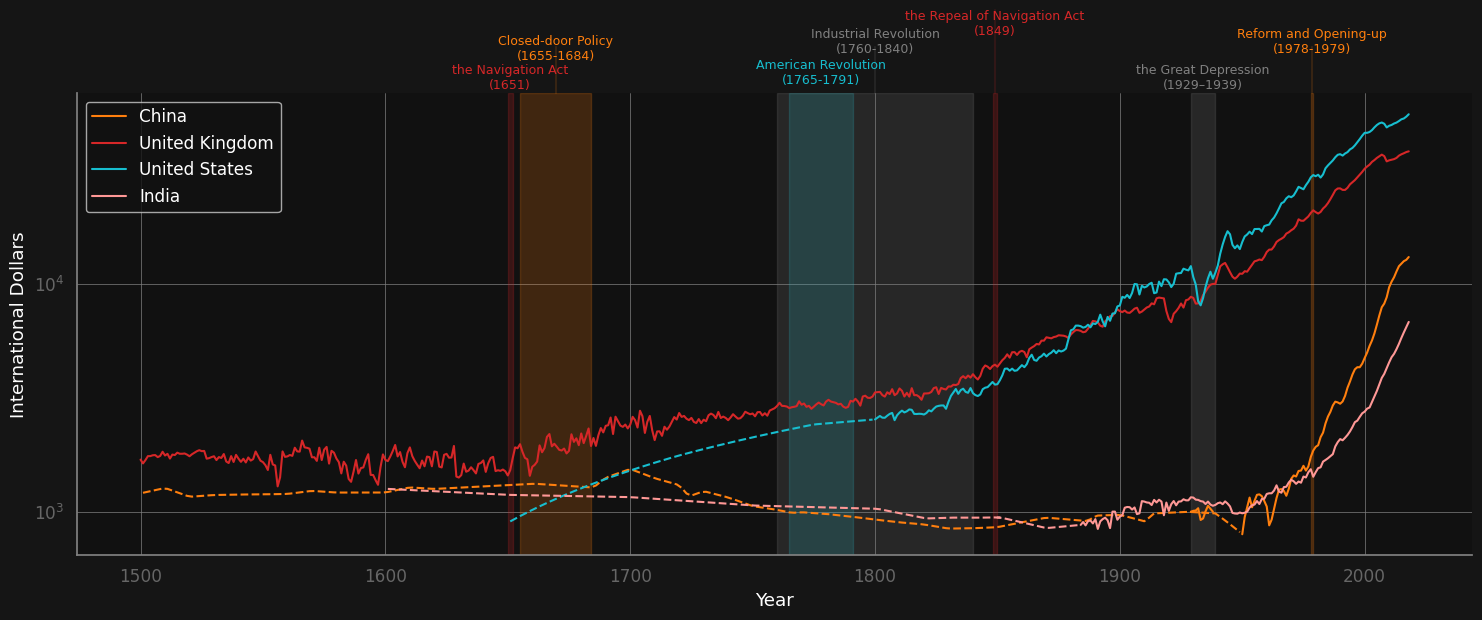

In [10]:
plot_with_events(
    countries=["CHN", "GBR", "USA", "IND"],
    country_codes=code_to_name,
    gdp_pc=gdp_pc,
    start_year=1500,
    end_year=2022,
    events=world_events,
)

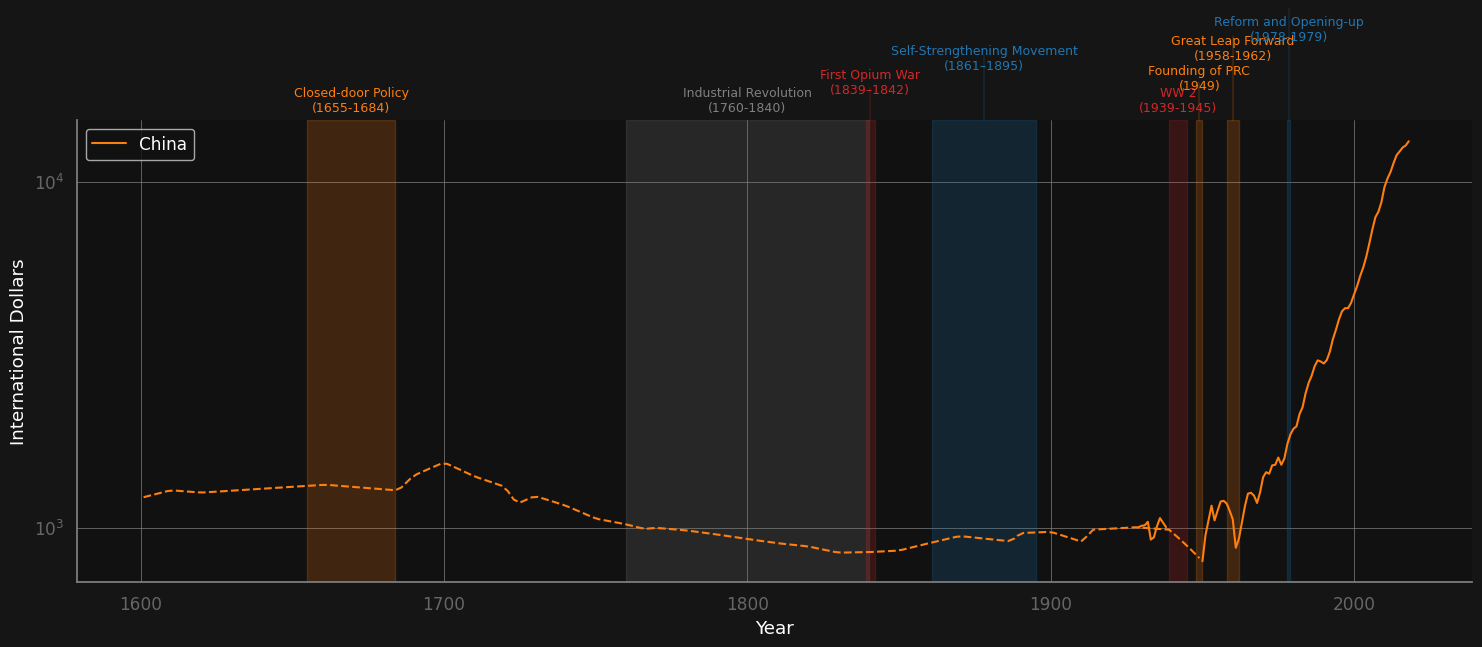

In [11]:
plot_with_events(
    countries=["CHN"],
    country_codes=code_to_name,
    gdp_pc=gdp_pc,
    start_year=1600,
    end_year=2022,
    events=[
        Event(
            (1655, 1684),
            1.06,
            "Closed-door Policy\n(1655-1684)",
            "tab:orange",
            1,
        ),
        Event(
            (1760, 1840),
            1.06,
            "Industrial Revolution\n(1760-1840)",
            "grey",
            1,
        ),
        Event(
            (1839, 1842),
            1.2,
            "First Opium War\n(1839–1842)",
            "tab:red",
            1.07,
        ),
        Event(
            (1861, 1895),
            1.4,
            "Self-Strengthening Movement\n(1861–1895)",
            "tab:blue",
            1.14,
        ),
        Event((1939, 1945), 1.06, "WW 2\n(1939-1945)", "tab:red", 1),
        Event(
            (1948, 1950),
            1.23,
            "Founding of PRC\n(1949)",
            color_mapping["CHN"],
            1.08,
        ),
        Event(
            (1958, 1962),
            1.5,
            "Great Leap Forward\n(1958-1962)",
            "tab:orange",
            1.18,
        ),
        Event(
            (1978, 1979),
            1.7,
            "Reform and Opening-up\n(1978-1979)",
            "tab:blue",
            1.24,
        ),
    ],
)

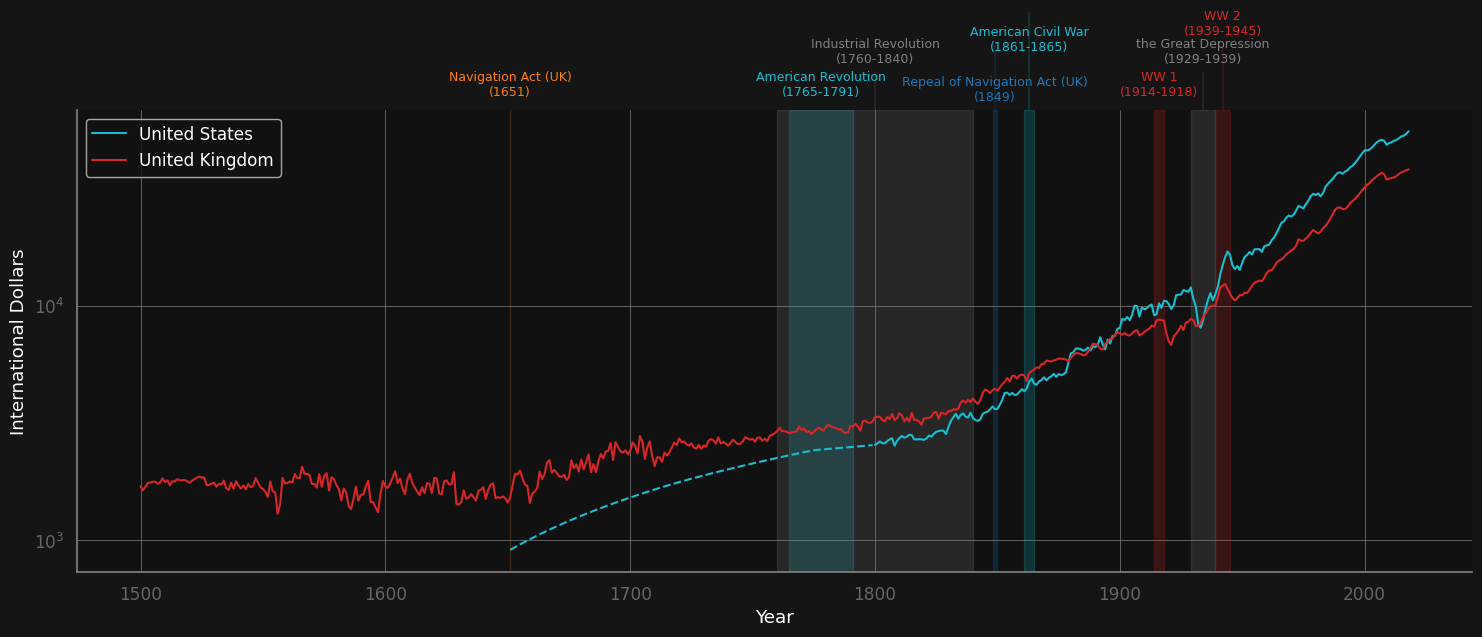

In [15]:
plot_with_events(
    countries=["USA", "GBR"],
    country_codes=code_to_name,
    gdp_pc=gdp_pc,
    start_year=1500,
    end_year=2022,
    events=[
        Event(
            (1651, 1651),
            1.15,
            "Navigation Act (UK)\n(1651)",
            "tab:orange",
            1,
        ),
        Event(
            (1765, 1791),
            1.15,
            "American Revolution\n(1765-1791)",
            color_mapping["USA"],
            1,
        ),
        Event(
            (1760, 1840),
            1.6,
            "Industrial Revolution\n(1760-1840)",
            "grey",
            1.08,
        ),
        Event(
            (1848, 1850),
            1.1,
            "Repeal of Navigation Act (UK)\n(1849)",
            "tab:blue",
            1.14,
        ),
        Event(
            (1861, 1865),
            1.8,
            "American Civil War\n(1861-1865)",
            color_mapping["USA"],
            1.21,
        ),
        Event((1914, 1918), 1.15, "WW 1\n(1914-1918)", "tab:red", 1),
        Event(
            (1929, 1939),
            1.6,
            "the Great Depression\n(1929-1939)",
            "grey",
            1.08,
        ),
        Event(
            (1939, 1945),
            2.1,
            "WW 2\n(1939-1945)",
            "tab:red",
            1.14,
        ),
    ],
)